In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [63]:
iris=load_iris()

In [76]:
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [77]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
df = pd.DataFrame({'X':iris.data[:,0],'Y':iris.data[:,1],'cluster':iris.target})

In [67]:
df

,X,Y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [68]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
data=df
cluster_model = KMeans(n_clusters=3)
cluster_model

KMeans(n_clusters=3)

In [81]:
cluster_model.fit(df)

KMeans(n_clusters=3)

In [82]:
df['labels'] = cluster_model.labels_

In [83]:
df

,X,Y,cluster,labels
0,5.1,3.5,0,1
1,4.9,3.0,0,1
2,4.7,3.2,0,1
3,4.6,3.1,0,1
4,5.0,3.6,0,1
...,...,...,...,...
145,6.7,3.0,2,0
146,6.3,2.5,2,0
147,6.5,3.0,2,0
148,6.2,3.4,2,0


In [84]:
cluster_model.cluster_centers_

array([[ 6.74693878e+00,  3.03673469e+00,  1.87755102e+00,
         1.00000000e+00],
       [ 5.00600000e+00,  3.42800000e+00,  0.00000000e+00,
        -6.66133815e-16],
       [ 5.79607843e+00,  2.71372549e+00,  1.13725490e+00,
         2.00000000e+00]])

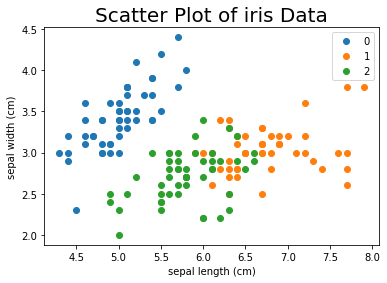

In [73]:
for label in df.labels.unique():
    plt.plot(df.loc[df.labels == label, 'X'],
            df.loc[df.labels == label, 'Y'], 'o', label=label)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Scatter Plot of iris Data', fontsize=20)
plt.legend()
plt.show()

In [74]:
error = []
for k in range(1,11):
    cluster_model = KMeans(k)
    cluster_model.fit(data)
    error.append(cluster_model.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


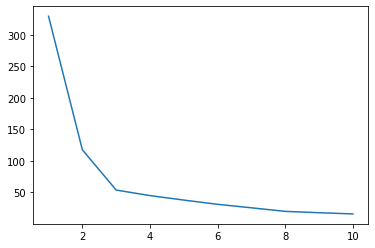

In [42]:
plt.plot(range(1,11), error)
plt.show()